In [7]:
import spot
spot.setup(show_default='.a')

In [112]:
def simpl(form):
    f = spot.formula(form).simplify().unabbreviate('WM')
    display(f)
    return f.to_str(parenth=True)

* literature_full [DONE]
* literature_ltl3dra [DONE]
* random_ltl3dra [DONE]
* random_full []

## Spot
* bug in TELA->TGBA conversion found in *random_ltl3dra* on formula `'F((G(a)) | (G((b) | (F(c)))))'` is described in [Determinization in Spot](Determinization in Spot.ipynb)
  - also for [190]: `(a | b | G((Gc & F!d) | (F!c & Gd))) U a`
  - also for [304]: `((p0) & (F(p1)) & (F(((F(p1)) & (G(!(p0)))) | ((F(p0)) & (G(!(p1))))))) | (((!(p0)) | (G(!(p1)))) & (G(((F(p0)) & (F(p1))) | (G((!(p0)) & (!(p1)))))))`
  - also for [351]: `F((G(p0)) | ((F(!(p1))) & ((!(p2)) | (!(p3)) | (F(p0)))) | ((p2) & (p3) & (G((!(p0)) & (p1)))))`

## LTL3TELA
* seg fault on `Fp0 | (!p0 & Fp2)` and `!(Fp0 | (!p0 & Fp2))`  found in *random_ltl3dra* on formula `(F(p0)) | ((!(p0)) & ((G(p1)) U (p2)))` is described in [LTL3TELA](LTL3TELA.ipynb)

## Rab3.1
* Empty automaton for `Ga & X(a & Gb)` found in *random_ltl3dra* on formula `a & Gb & X((Xb & G(c & !d)) | (X!b & F(!c | d)))` [184] is described in [Rab3.1_no_acc](Rab3.1_no_acc.ipynb)

## Rab4
* Bug in `ltl2dpa --mode=ldba` from Rab4 found from *literature_full* on formula `!((F(p0)) & (((p1) & ((p0) R ((p0) | (p2)))) R (!(p0))))` is described in [ltl2dpa_ldba_bug](ltl2dpa_ldba_bug.ipynb)
* Bug in `ltl2dpa --mode=ldba` from Rab4 found from *literature_ltl3dra* on formula `(G(!(p0))) | (((p1) | ((!(p0)) U ((!(p0)) & (p2) & (X((!(p0)) U (p3)))))) U (p0))` is described in [ltl2dpa_ldba](ltl2dpa_ldba.ipynb)
* Bug and nondeterminism in `ltl2dgra` revealed. It was found in *random_full* on formula [481]: `'G(F(((p0) & ((p0) R (F(p1))) & (F(((p2) & (X(p0))) | ((!(p2)) & (X(!(p0))))))) | (((!(p0)) U (G(!(p1)))) & ((!(p0)) | (G(((p2) & (X(!(p0)))) | ((!(p2)) & (X(p0)))))))))'`. It is described in [Rabinizer4](Rabinizer4.ipynb)

# Working area

In [129]:
!ltl3tela -f '(a | b | G((Gc & F!d) | (F!c & Gd))) U a'

HOA: v1
States: 6
Start: 0
AP: 4 "a" "b" "c" "d"
acc-name: Buchi
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[!0&1] 0
[0] 1
[!0&!1&2] 2
[!0&!1&3] 3
State: 1
[t] 1 {0}
State: 2
[!0&2] 2
[0&2] 4
State: 3
[!0&3] 3
[0&3] 5
State: 4
[2&!3] 4 {0}
[2&3] 4
State: 5
[!2&3] 5 {0}
[2&3] 5
--END--


In [243]:
!../Rab4/bin/ltl2dra  | autfilt -S

Dec 21, 2017 5:12:26 PM owl.run.PipelineRunner$TransformerExecution lambda$call$0
INFO: Meta information for G(F(p0 & ((p0) R (Fp1)) & (F(p2 & Xp0) | F(!p2 & X!p0))) | F(((!p0) U (G!p1)) & (!p0 | G((p2 & X!p0) | (!p2 & Xp0))))):
Execution of transformers took 1.06 sec
autfilt: print_hoa(): automaton is complete but prop_complete()==false


In [245]:
f = simpl('G(F(((p0) & ((p0) R (F(p1))) & (F(((p2) & (X(p0))) | ((!(p2)) & (X(!(p0))))))) | (((!(p0)) U (G(!(p1)))) & ((!(p0)) | (G(((p2) & (X(!(p0)))) | ((!(p2)) & (X(p0)))))))))')

GF((p0 & (p0 R Fp1) & F((p2 & Xp0) | (!p2 & X!p0))) | ((!p0 U G!p1) & (!p0 | G((p2 & X!p0) | (!p2 & Xp0)))))

In [255]:
f = simpl('GF((p0 | Gp2) & (p0 W Gp1))')

GF((p0 | Gp2) & (Gp1 R (p0 | Gp1)))

In [263]:
f

'G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1))))))'

In [256]:
nf = simpl('!('+f+')')

FG((!p0 & F!p2) | F(!p0 & F!p1))

In [260]:
!ltlcross -t ltl2tgba -t "../Rab4/bin/ltl2dra  %f > %O" -t "../Rab4/bin/ltl2dgra  %f > %O" -f '{f}'

G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1))))))
Running [P0]: ltl2tgba -H 'G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1))))))'>'lcr-o0-GnWOhh'
Running [P1]: ../Rab4/bin/ltl2dra  'G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1))))))' > 'lcr-o1-D3o3HY'
Dec 21, 2017 5:24:45 PM owl.run.PipelineRunner$TransformerExecution lambda$call$0
INFO: Meta information for GF((p0 | Gp2) & ((Gp1) R ((p0 | Gp1)))):
Execution of transformers took 0.35 sec
Running [P2]: ../Rab4/bin/ltl2dgra  'G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1))))))' > 'lcr-o2-ADZdNI'
Dec 21, 2017 5:24:46 PM owl.run.PipelineRunner$TransformerExecution lambda$call$0
INFO: Meta information for GF((p0 | Gp2) & ((Gp1) R ((p0 | Gp1)))):
Execution of transformers took 0.32 sec
Running [N0]: ltl2tgba -H '!(G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1)))))))'>'lcr-o0-vbf8tv'
Running [N1]: ../Rab4/bin/ltl2dra  '!(G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1)))))))' > 'lcr-o1-3rANdi'
Dec 21, 2017 5:24:47 PM owl.run.Pipe

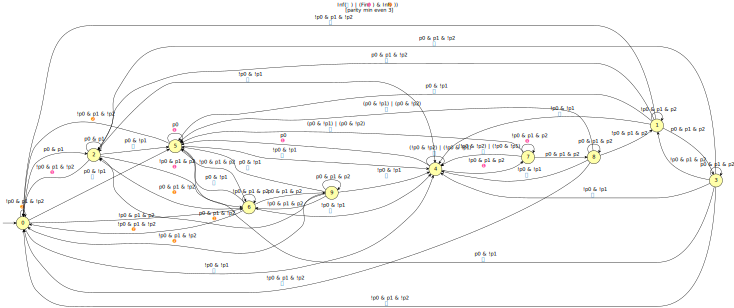

In [262]:
spot.automaton("../Rab4/bin/ltl2dgra  '!(G(F(((p0) | (G(p2))) & ((G(p1)) R ((p0) | (G(p1)))))))' |")